
<h1 align="center">
  Lava, Lava-DNF and the Loihi Software Ecosystem

</h1>

## Software Ecosystem:

### The relationship between Magma and Lava

<h1 align="center">
<img src="magma_versus_lava.png" 
     width="300" 
     height="350" />
</h1>


### Lava Magma follows a composable coding paradigm.
* Lava architecture "is inspired from the Communicating Sequential Process (CSP) paradigm for asynchronous, parallel systems that interact via message passing." -- Qoute from Lava README.md

### Since Lava is "composable" in theory these older Loihi coding paradigms should be interopable:
* Intel: NxSDK Also known as the Loihi Neurocore API
* SNIPS C code.

* "The specific components of Magma needed to compile processes specifically to Intel Loihi chips remains proprietary to Intel and is not provided through this GitHub site (see below). Similar Magma-layer code for other future commercial neuromorphic platforms likely will also remain proprietary." -- Qoute from Lava README.md

## Loihi

<h1 align="center">
<img src="loihi_diagram.png" 
     width="300" 
     height="450" />
</h1>
     
     
### Lava Dynamic Neural Fields Lava-DNF 
* DNF is the subset of the Lava paradigm that has a lot of useful patterns for specifying biological connectivity. 
* https://github.com/lava-nc/lava-dnf


# Usefulness of Lava-DNF for large scale biological modelling work

#### What we want from an interface

- [x] Means to specify forwards connectivity between populations (but it feels cumbersome).
- [x] Means to specify recurrent connectivity between populations (but it feels cumbersome).
- [ ] Ability to visualize the whole architecture (nothing like TorchViz for ANN architecture yet).
- [x] Ability to define LIF Cell populations.
- [x] Inhibitory Synapses (negative weight values possible)
- [ ] Spike Timing Dependent Plasticity (STDP), or on chip local learning rules (coming).  
- [ ] Delay Learning (probably not even planned)
- [ ] Adaptive Neurons (supported by SLAYER allegedly composable)
- [x] Capacity to support high cell counts.
- [ ] performance profiling (including power consumption). (coming)



<h1 align="center">
  To show how I established the tick box above a Lava-DNF code demonstration follows.
</h1>


To evaluate whether Lava is useful for making bioplausible models, we want to define a variety of overlapping Spiking Neural Network (SNN) architectures, you can think of each one as a weighted directed graph: 

# $G(V, E)$

Below is a diagram of the Potjan's cortical model. This model can be thought of as the composition of many weighted directed graphs, therefore we will use Lava a supported interface to instantiate a cortical model of V1 on a Python Loihi simulator.

<h1 align="center">

<img src="Schematic-diagram-of-the-Potjans-Diesmann-cortical-microcircuit-model.png" 
     width="300" 
     height="350" />
</h1>

## Warning, this NB needs Python-3.8 minimum


## Import some packages.

In [1]:
from lava.lib.dnf.operations.operations import Weights
from lava.lib.dnf.operations.operations import *
from lava.proc.lif.process import LIF
from lava.lib.dnf.inputs.rate_code_spike_gen.process import RateCodeSpikeGen
from lava.lib.dnf.connect.connect import connect
from lava.lib.dnf.operations.operations import Weights
from lava.magma.core.run_configs import Loihi1SimCfg #Loihi simulator, not  Loihi itself.
from lava.magma.core.run_conditions import RunSteps
from lava.proc.monitor.process import Monitor
from lava.proc.monitor.models import PyMonitorModel
from lava.lib.dnf.inputs.gauss_pattern.process import GaussPattern
from lava.lib.dnf.kernels.kernels import MultiPeakKernel
import numpy as np
from lava.lib.dnf.utils.plotting import raster_plot


# Cortical Specs:
### These numbers are nominal. I chose them to fit the performance of an embattled thinkpad laptop:
* 2 columns.
* 4 layers
* 1 excitatory and 1 inhibitory population per layer.
* 85 cells per population 170 cells per layer.

In [2]:

ncolumns=2



### Create the layerwise populations 

In [3]:
ly_2_3_ex = np.ndarray((ncolumns),dtype=object)
ly_4_ex = np.ndarray((ncolumns),dtype=object)
ly_5_ex = np.ndarray((ncolumns),dtype=object)
ly_6_ex = np.ndarray((ncolumns),dtype=object)


ly_2_3_in = np.ndarray((ncolumns),dtype=object)
ly_4_in = np.ndarray((ncolumns),dtype=object)
ly_5_in = np.ndarray((ncolumns),dtype=object)
ly_6_in = np.ndarray((ncolumns),dtype=object)

ncells = 85
for i in range(0,ncolumns):
    ly_2_3_ex[i] = LIF(shape=(ncells,))
    ly_4_ex[i] = LIF(shape=(ncells,))
    ly_5_ex[i] = LIF(shape=(ncells,))
    ly_6_ex[i] = LIF(shape=(ncells,))


    ly_2_3_in[i] = LIF(shape=(ncells,))
    ly_4_in[i] = LIF(shape=(ncells,))
    ly_5_in[i] = LIF(shape=(ncells,))
    ly_6_in[i] = LIF(shape=(ncells,))

    

<h1 align="center"> Create the connectivity pattern </h1>

<h1 align="center">
    <img src="Schematic-diagram-of-the-Potjans-Diesmann-cortical-microcircuit-model.png" 
         width="300" 
         height="350" />
</h1>

* from the Potjan's wiring diagram
researchgate.net/figure/Schematic-diagram-of-the-Potjans-Diesmann-cortical-microcircuit-model_fig1_349443713

# Instruct stereo typed connections whithin and between layers:

In [4]:

connections=[]
for i in range(0,ncolumns):
        
    one2onec = connect(ly_2_3_ex[i].s_out, ly_2_3_ex[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    #ly_4_ex[i] 2 ly_4_ex[i]
            
    one2onec = connect(ly_4_ex[i].s_out, ly_4_ex[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    #ly_5_ex[i] 2 ly_5_ex[i]
    one2onec = connect(ly_5_ex[i].s_out, ly_5_ex[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    #ly_6_ex[i] 2 ly_6_ex[i]
    one2onec = connect(ly_6_ex[i].s_out, ly_6_ex[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)



In [5]:
for i in range(0,ncolumns):
    #ly_2_3_in[i] 2 ly_2_3_in[i]
    one2onec = connect(ly_2_3_in[i].s_out, ly_2_3_in[i].a_in, ops=[Weights(-0.5)])
    connections.append(one2onec)

    #ly_4_in[i] 2 ly_4_in[i]
    one2onec = connect(ly_4_in[i].s_out, ly_4_in[i].a_in, ops=[Weights(-0.5)])
    connections.append(one2onec)

    #ly_5_in[i] 2 ly_5_in[i]
    one2onec = connect(ly_5_in[i].s_out, ly_5_in[i].a_in, ops=[Weights(-0.5)])
    connections.append(one2onec)

    #ly_6_in[i] 2 ly_6_in[i]
    one2onec = connect(ly_6_in[i].s_out, ly_6_in[i].a_in, ops=[Weights(-0.5)])
    connections.append(one2onec)

for i in range(0,ncolumns):

    #ly_2_3_ex[i] 2 ly_2_3_in[i]
    one2onec = connect(ly_2_3_ex[i].s_out, ly_2_3_in[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    #ly_4_ex[i] 2 ly_4_in[i]
    one2onec = connect(ly_4_ex[i].s_out, ly_4_in[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    #ly_5_ex[i] 2 ly_5_in[i]
    one2onec = connect(ly_5_ex[i].s_out, ly_5_in[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    #ly_6_ex[i] 2 ly_6_in[i]
    one2onec = connect(ly_6_ex[i].s_out, ly_6_in[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

for i in range(0,ncolumns):
    #ly_2_3_in[i] 2 ly_2_3_exc[i]
    # ly_2_3_ex
    one2onec = connect(ly_2_3_in[i].s_out, ly_2_3_ex[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)

    #ly_4_in[i] 2 ly_4_exc[i]
    one2onec = connect(ly_4_in[i].s_out, ly_4_ex[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)

    #ly_5_in[i] 2 ly_5_exc[i]
    one2onec = connect(ly_5_in[i].s_out, ly_5_ex[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)
    
    #ly_6_in[i] 2 ly_6_exc[i]
    one2onec = connect(ly_6_in[i].s_out, ly_6_ex[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)


### More specific between layer connections:

In [6]:
for i in range(0,ncolumns):
    one2onec = connect(ly_2_3_ex[i].s_out, ly_5_ex[i].s_out, ops=[Weights(1.0)])
    connections.append(one2onec)

    one2onec = connect(ly_2_3_ex[i].s_out, ly_4_in[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    one2onec = connect(ly_2_3_ex[i].s_out, ly_5_in[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)


In [7]:
for i in range(0,ncolumns):

    one2onec = connect(ly_5_ex[i].s_out, ly_4_in[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    one2onec = connect(ly_6_ex[i].s_out, ly_4_ex[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    one2onec = connect(ly_6_ex[i].s_out, ly_2_3_in[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)


In [8]:

for i in range(0,ncolumns):

    one2onec = connect(ly_2_3_ex[i].s_out, ly_2_3_in[i].a_in, ops=[Weights(-0.5)])
    connections.append(one2onec)

In [9]:
for i in range(0,ncolumns):

    one2onec = connect(ly_4_ex[i].s_out, ly_2_3_ex[i].s_out, ops=[Weights(1.0)])
    connections.append(one2onec)

    one2onec = connect(ly_4_ex[i].s_out, ly_5_ex[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

    one2onec = connect(ly_5_ex[i].s_out, ly_6_ex[i].a_in, ops=[Weights(1.0)])
    connections.append(one2onec)

# Specify a direct connection between each of the two columns
As a demonstration only

layer 2-3 of Column2 (index 1) gets no tonic input, its input is just the output of column 1 (index 0)
ly_2_3_ex[1]


In [10]:
one2onec = connect(ly_2_3_ex[0].s_out, ly_2_3_ex[1].s_out, ops=[Weights(5.0)])
connections.append(one2onec)

# Despite the elaborate wiring instructions the wiring is flawed.

* Currently the network has no convergence or divergence between or across layers, so its not so much a network, and more of a series of parallel Feedforward lines, like in the figure below:

<h1 align="center">
    <img src="one_to_one_connectivity.png" 
         width="90" 
         height="40"/>
</h1>
# TODO:

- [ ] Use the OSB PyNN model to wire layer to layer connections with established probabilities from Potjan's.
https://github.com/NeuralEnsemble/PyNN/blob/master/examples/Potjans2014/network.py




# Create tonic input for the network.

In [11]:
spike_generator_1 = RateCodeSpikeGen(shape=ncells,)
center_cell=ncells/2.0
spread_across_number_of_cells=ncells # 125
gauss_pattern_1 = GaussPattern(shape=ncells,
                               amplitude=100,
                               mean=center_cell,
                               stddev=spread_across_number_of_cells)
gauss_pattern_1.a_out.connect(spike_generator_1.a_in)

for i in range(0,ncolumns):
    _=connect(spike_generator_1.s_out, ly_4_ex[i].a_in, [Weights(2.5)])


# Run the psuedo potjans model on CPU for 50ms

Strangely you only have to run a segment of the model to run the whole model.

Model segments seem to have parent child relationships with other segments if they are connected with network connections, and the Loihi compiler seems to understand that.

In [12]:
def dont_do():
    compiled = ly_4_ex[0].compile(run_cfg=Loihi1SimCfg(select_tag='floating_pt'))
    print(dir(compiled))
    print(compiled.node_configs[0])
    ly_4_ex[0].save('model_test.p')
    print(ly_4_ex[0].vars.vth)
    print(connections[-2].weights)
    print(dir())



# Set up the experimental recording rig

In [13]:

time_steps = 50

monitor_ly_2_3_ex = Monitor()
monitor_ly_2_3_ex.probe(target=ly_2_3_ex[0].s_out, num_steps=time_steps)
monitor_ly_2_3_in = Monitor()
monitor_ly_2_3_in.probe(target=ly_2_3_in[0].s_out, num_steps=time_steps)
monitor_ly_4_ex = Monitor()
monitor_ly_4_ex.probe(target=ly_4_ex[0].s_out, num_steps=time_steps)
monitor_input_1 = Monitor()
monitor_input_1.probe(spike_generator_1.s_out, time_steps)
other_column = Monitor()
other_column.probe(ly_2_3_ex[1].s_out, time_steps)



ly_4_ex[0].amplitude = 100
ly_4_ex[0].run(condition=RunSteps(num_steps=time_steps),
        run_cfg=Loihi1SimCfg(select_tag='floating_pt'))




# Get probed data from monitors


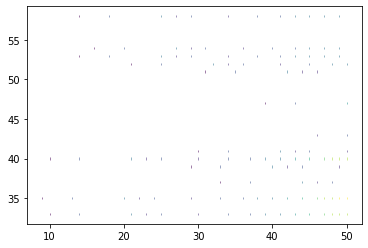

In [14]:

data_input1 = monitor_input_1.get_data()\
    [spike_generator_1.name][spike_generator_1.s_out.name]

data_ly_2_3_ex = monitor_ly_2_3_ex.get_data()\
    [ly_2_3_ex[0].name][ly_2_3_ex[0].s_out.name]

data_ly_2_3_in = monitor_ly_2_3_in.get_data()\
    [ly_2_3_in[0].name][ly_2_3_in[0].s_out.name]


data_ly_4_ex = monitor_ly_4_ex.get_data()\
    [ly_4_ex[0].name][ly_4_ex[0].s_out.name]





raster_plot(data_ly_2_3_ex.T)



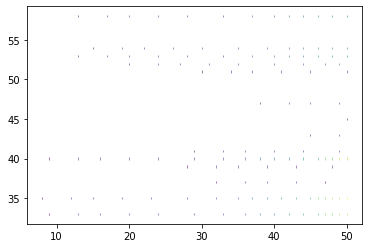

In [15]:

raster_plot(data_ly_4_ex.T)


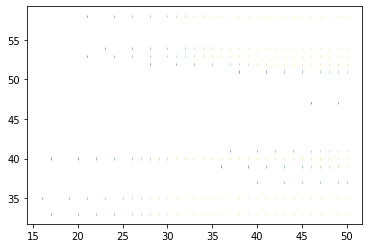

In [16]:
raster_plot(data_ly_2_3_in.T)


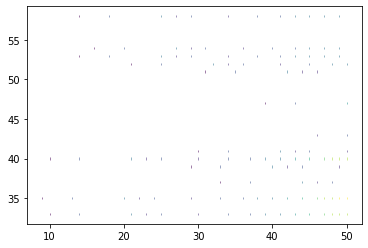

In [17]:
raster_plot(data_ly_2_3_ex.T)

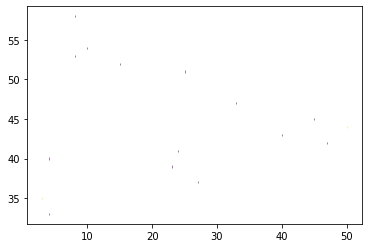

In [18]:

raster_plot(data_input1.T)



### Check to see that brain activity propogated from one column to the other via a dedicated connection

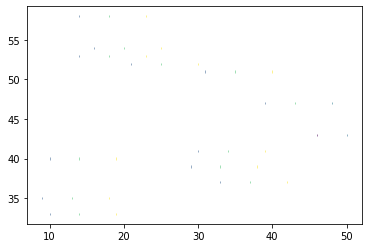

In [19]:
data_ly_2_3_ex = other_column.get_data()\
    [ly_2_3_ex[1].name][ly_2_3_ex[1].s_out.name]


raster_plot(data_ly_2_3_ex.T)


### My verdict the overall approach works for some things but not others.

- [x] Fan in and fan out achievable with connection kernels, but this can feel a bit cumbersome
- [x] Mexican hat weight distributions (lateral inhibition) can be coded, which is good but also feels cumbersome.
- [x] Means to specify forwards connectivity between populations (but it feels cumbersome).
- [x] Means to specify recurrent connectivity between populations (but it feels cumbersome).
- [x] Ability to define LIF Cell populations.
- [x] Inhibitory Synapses (negative weight values possible)
- [x] Capacity to support high cell counts.

### Missing
- [ ] No synaptic learning capability yet. 
    *... and It's not clear how to hack STDP in.
- [ ] Although Lava is advertised as composable (interopable with external code) it's unlikely that an arbitrary model of STDP can be translated through the Loihi compiler.
- [ ] It's not clear how composable the LAVA approach is with NxSDK and SNIPs (without breaking Loihi compilation).
- [ ] Loihi compilation is still intentionally opaque (proprietary code).
- [ ] Ability to visualize the whole architecture (nothing like TorchViz for ANN architecture yet).
- [ ] Delay Learning (probably not even planned)
- [ ] performance profiling (including power consumption). (coming)


